# BankLoan Dataset
Responsibility : Yahia Ehab

## Imports

In [2]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [3]:
df = pd.read_csv("./AMLAss1Datasets/bankloan.csv")  # Suitable for regression

## Preprocessing

* Dataset has no nulls
* Choosing only columns that we will use
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Encoding the categorical features
    ```python
    label_encoder = LabelEncoder() #Convert categorical variables into numerical format
    ```
* Removing outliers using `IQR` method

In [4]:
df = df[
    [
        "Age", "Experience", "Income",
        "Family", "CCAvg", "Education",
        "Mortgage", "Personal.Loan", "Securities.Account",
        "CD.Account", "Online", "CreditCard",
    ]
]

# Renaming the columns
df.columns = [
    "age", "experience", "income", "family",
    "cc_avg","education", "mortgage", 
    "personal_loan", "securities_account", 
    "cd_account", "online", "credit_card",
]

In [5]:
# Scaling the numerical features
scaler = StandardScaler()
df[["age", "experience", "income", "cc_avg", "mortgage"]] = scaler.fit_transform(
    df[["age", "experience", "income", "cc_avg", "mortgage"]]
)

# Encoding the categorical features
label_encoder = LabelEncoder()
df["education"] = label_encoder.fit_transform(df["education"])

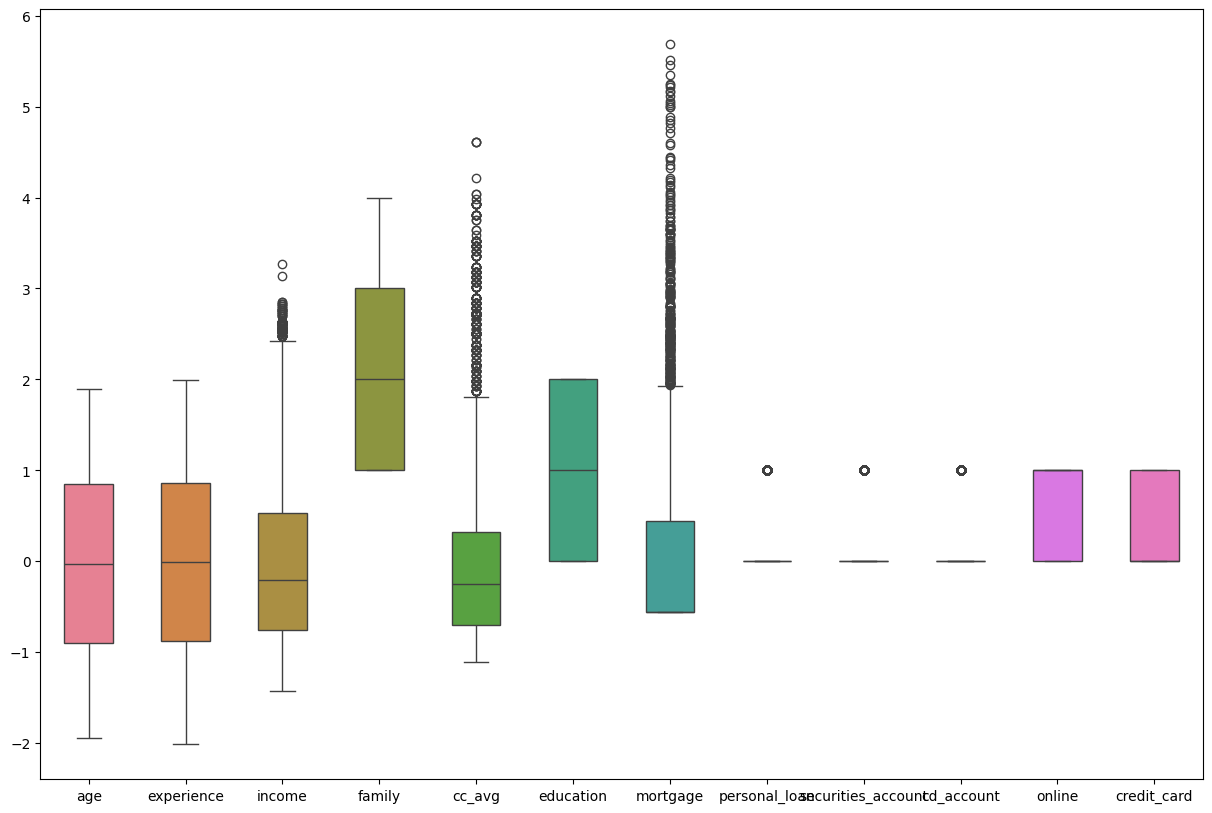

In [6]:
# Check for outliers 
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, width=0.5)
plt.show()

In [7]:
# Removing the outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
df.head()

,age,experience,income,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
2,-0.552992,-0.445163,-1.363793,1,-0.536736,0,-0.555524,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,1,0.436091,1,-0.555524,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,4,-0.536736,1,-0.555524,0,0,0,0,1
5,-0.727481,-0.619580,-0.972736,4,-0.880087,1,0.968512,0,0,0,1,0
6,0.668434,0.601336,-0.038545,2,-0.250611,1,-0.555524,0,0,0,1,0


## Model Implementation &  Hyperparameter Turning

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

### Train Test split

In [9]:
X = df.drop("personal_loan", axis=1)
y = df["personal_loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forrest Classifier

In [19]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Model evaluation
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [14]:
# Hyperparameters
param_dist = {
    "n_estimators": [50, 100, 150, 200, 250],
    "max_depth": [3, 5, 7, 9, 11, 13],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8],
    "bootstrap": [True, False],
}

In [26]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

rf_random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42
)

rf_random_search.fit(X_train, y_train)

rf_random_search.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}

In [27]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

rf_grid_search = GridSearchCV(rf_model, param_grid=param_dist, cv=5)

rf_grid_search.fit(X_train, y_train)

rf_grid_search.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

In [28]:
# Random Forest Classifier with best hyperparameters
rf_model_best = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
)

rf_model_best.fit(X_train, y_train)
y_pred = rf_model_best.predict(X_test)

# Model evaluation
print("Random Forest Classifier with best hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))


Random Forest Classifier with best hyperparameters
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### AdaBoost

In [29]:
# AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

# Model evaluation
print("AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred,zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred,zero_division=1))

AdaBoost Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [30]:
# Hyperparameters
param_dist = {
    "n_estimators": [50, 100, 150, 200, 250],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
}

In [31]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

ada_random_search = RandomizedSearchCV(
    ada_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42
)

ada_random_search.fit(X_train, y_train)

ada_random_search.best_params_

{'n_estimators': 50, 'learning_rate': 0.01}

In [ ]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

ada_grid_search = GridSearchCV(ada_model, param_grid=param_dist, cv=5)

ada_grid_search.fit(X_train, y_train)

ada_grid_search.best_params_